# TO DO STILL
- import TV tropes
- fix bechdel df
- trier graphs
- visualization : séparer preprocessing / graphe (où mettre preprocessing ?)
- analysis of each graph
- fix a few graphs
- entête de fonctions

# **ADApocalypse present :** "What do we do now ?"

## Project Initialisation

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
tqdm.pandas()
import json
from collections import defaultdict
#from transformers import pipeline
import ast
import re
import plotly.express as px
import plotly.graph_objects as go

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.preprocessing import StandardScaler
# from statsmodels import tools
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier, plot_tree
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix
# import seaborn as sns

# import folium
# import geopandas as gpd
# from folium import Choropleth, CircleMarker, Popup

# not displaying warnings
pd.options.mode.chained_assignment = None 

# to facilitate the use of py files
%load_ext autoreload
%autoreload 2



In [87]:
from src.data.data_loader import *
from src.data.data_transformer import *
from src.utils.visualization import *
from src.utils.methods import *


### Constants

In [4]:
PROCESSED_DATA_FOLDER_PATH = 'data/processed/'

COLOR_MALE = '#636EFA'
COLOR_FEMALE = '#EF553B'
COLOR_PALETTE = [COLOR_MALE, COLOR_FEMALE]

LABELS = {"number_of_movies": "Number of Movies", 
          "movie_genres": "Movie Genres", 
          "country": "Country", 
          "char_name": "Number of Characters per movie",
          "actor_gender": "Actor Gender",
          "movie_release_date": "Release Year", 
          "movie_box_office": "Box Office", 
          "movie_runtime": "Runtime", 
          "movie_imdb_rating": "IMDB Rating", 
          "num_votes": "Number of Votes", 
          "average_rating": "Average Rating", 
          "director_gender": "Director Gender", 
          "box_office_revenue": "Movie Box Office Revenue", 
          "movie_rendement": "Movie Rendement"}

# 1. Loading file

We processed the data of each dataframe (detail in src/data/data_transformer) and computed the following functions once in order to generate the csv file :
- preprocess_movie_metadata()
- preprocess_char_metadata()
- preprocess_imdb_ratings(movies_metadata_df)

We applied the following rules to filter and preprocess the files: 
- all movies without release date were dropped
- all movies with a release date outside of the range 1910-2013 were dropped
- the release date were standardized into realase year
- thanks to another external dataset the missing gender were added
- the characters without a gender were dropped 

In order to fully understand the details behind the preprocessing, we refer you to the additional comments of each function definition and P2.

We imported and transformed external datasets collected from different websites regarding :
- Bechdel Test API with process_bechdel_ratings(movies_metadata_df)
- TV Tropes (additional dataset)
- Metadata regarding Success (IMDB ratings, budget, box office revenue from TMDB dataset)
- Movie Directors from wikipedia (get_director_name_and_gender())

We also preprocessed them in the src/data/data_transformer file. For information, some files are too big to be stored in the repository so all results are already pre run.

**on a tout preprocess en amont, et on a tout foutu dans 1 fichier**


Loading the raw files from the CMU movie dataset.

In [ ]:
# preprocess_movies_complete(from_files=True) - to do once to generate the csv file

In [64]:
movies_complete_df = load_csv(PROCESSED_DATA_FOLDER_PATH + 'movies_complete.csv')

Loaded data from data/processed/movies_complete.csv, shape: (60347, 19)


In [6]:
print(f'We now have {movies_complete_df.shape[0]} movies.')

We now have 60347 movies.



# 2. Data Analysis

## A. Movie Directors

# % À REVOIR

In [29]:
# distribution of genders amongst movie directors
gender_distrib(movies_complete_df, 'director_gender', 'Gender distribution of movies director', 'director_gender', COLOR_PALETTE, LABELS)

**Analysis**
# TO DO

## B. Representation of female actors

### 1) Overview

In [46]:
plot_gender_distribution(movies_complete_df, 'actor_genders', COLOR_PALETTE)

This graph illustrates genre inequalities amongst movie characters. As we can see, overall only 1/3 of the characters are female.

# HOMONGÉNÉISER OU CHANGER NOM DES FONCTIONS

**Analysis**
# TO DO

### 2) Age Distribution

In [64]:
female_female_percentage, female_male_percentage = actor_age_according_to_dir_gender(movies_complete_df.explode(['actor_genders', 'actor_age']), 'F')
male_female_percentage, male_male_percentage = actor_age_according_to_dir_gender(movies_complete_df.explode(['actor_genders', 'actor_age']), 'M')

In [72]:
# plot each age distribution
fig = go.Figure()
age_actors_by_dir_gender(fig, female_female_percentage, "Female Actors (Female Directors)", COLOR_FEMALE, 'solid')
age_actors_by_dir_gender(fig, female_male_percentage, "Male Actors (Female Directors)", COLOR_MALE, 'solid')
age_actors_by_dir_gender(fig, male_female_percentage, "Female Actors (Male Directors)", COLOR_FEMALE, 'dash')
age_actors_by_dir_gender(fig, male_male_percentage, "Male Actors (Male Directors)", COLOR_MALE, 'dash')
age_actors_layout(fig, "Age", 'Percentage (%)', "Age Distribution of Actors by Director Gender (Percentage)", "Actor Gender & Director Gender")

This graph illustrates the inequalities regarding opportunities given to older actors. Whereas the majority of male actors are between 30 and 50 years old, with an average of 40 years old, most women actors are only between 20 and 30 years old, with an average of 33 years old. The male actors seem to have a longer career than female ones. Once again, it would be interesting to compare this number according to the gender of the movie director and the genre of the movie. 

### 3) Female Characters in movies

In [77]:
plot_female_representation_with_directors(movies_complete_df)

# TO REVIEW

**Analysis**
# TO DO

### 4) Across the globe

As primary investigation, we conducted a small analysis regarding the geographical provenance of the movies of our dataset. Then, we dived into our subject by studying the average female representation in movies across the globe.

In [ ]:
# pre-processing
all_countries = movies_complete_df['movie_countries'].copy()
all_countries = [genre for sublist in movies_complete_df['movie_countries'] for genre in sublist]
countries_counts = Counter(all_countries)

country_df = pd.DataFrame(countries_counts.items(), columns=['country', 'number_of_movies'])
country_df = country_df.sort_values(by='number_of_movies', ascending=False)
country_df = country_df[country_df['number_of_movies'] > 500]

In [42]:
# plot the distribution of movies by countries
movies_by_country(country_df, 'country', 'number_of_movies', 'Distribution of Movies by Country', labels)

**Analysis**
We can see that we have a lot of movies from USA, UK, and Europe. Our analysis would be occidental-centered with an exception for India and north Asia countries.

We will now pursue our analysis by looking at the difference of the gender representation depending on the part of the world. 

# TO DO

In [ ]:
# representation of female characters in movies across the globe
map_M = map_fem_char(movies_complete_df[movies_complete_df["director_gender"] == "M"], "M")
map_F = map_fem_char(movies_complete_df[movies_complete_df["director_gender"] == "F"], "F")
# map_M.save("map_M.html")  # Save to file
# map_F.save("map_F.html")  # Save to file

**Analysis**
# TO DO AND TO RUN

### 5) Character distribution over movie genres

From our initial analysis, we obtained the following graph depicting the general tendancy of movies.

In [ ]:
# pre-processing of the data
all_genres = movies_complete_df['movie_genres'].copy()
all_genres = [genre for sublist in movies_complete_df['movie_genres'] for genre in sublist]
genre_counts = Counter(all_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['movie_genre', 'number_of_movies'])

genre_df = genre_df.sort_values(by='number_of_movies', ascending=False)
# keep only the genres with more than 500 movies
genre_df = genre_df[genre_df['number_of_movies'] > 500]

In [21]:
# plot the distribution of movies by genres
movies_by_genre(genre_df, 'movie_genre', 'number_of_movies', 'Distribution of Movies by Genre', LABELS)

The first analysis of the movie genres give us ideas and insights on how to conduct our future analysis.

From this distribution of movies by genre, we then selected the top-10 genres and looked at the gender distribution on them. 

Additionnally, we will also focus on some other genres because of clichés that we have spotted while doing the genre clustering:
- feminist films
- pornographic films
- LGBT films
- war and military films

# REVIEW

In [79]:
# character gender representation across top-10 Genres
plot_top10_genres(movies_complete_df[movies_complete_df["director_gender"] == "M"], "Male")
plot_top10_genres(movies_complete_df[movies_complete_df["director_gender"] == "F"], "Female")

**Analysis**
# TO DO

### 6) Across time

As usual, we first conducted a general analysis on the number of movies released over the years.

In [81]:
# converting date strings into integers
movies_complete_df['movie_release_date'] = movies_complete_df['movie_release_date'].apply(lambda x: int(x))

In [76]:
# preprocessing of the data
other = pd.DataFrame()
other["movie_release_date"] = movies_complete_df["movie_release_date"].unique()
other["number_of_movies"] = movies_complete_df.groupby("movie_release_date")['wikipedia_movie_id'].transform('count')
other.sort_values(by="movie_release_date", inplace=True)

In [85]:
# plot the distribution of movies released by year
movies_per_year(other, 'movie_release_date', 'number_of_movies', 'Number of Movies Released by Year', LABELS)

We can observe that the distribution of movies produced between 1910 until 2013 follows a heavy left-skewed distribution, with a notable increase during World War I. We can now wonder whether the temporal evolution of the number of movies follows the same distribution depending on the gender of the director.

**Analysis**
# TO DO

In [ ]:
# convert genders into numbers
char_metadata_df = movies_complete_df.copy(deep=True)
char_metadata_df["actor_gender_binary"] = char_metadata_df["actor_gender"].apply(lambda x: 0 if x=="M" else 1)
characters_gender_time = char_metadata_df.groupby("movie_release_date")["actor_gender_binary"].value_counts().unstack(fill_value=0).reset_index()

release_years_df = char_metadata_df.groupby("movie_release_date")["wikipedia_movie_id"].count()
characters_gender_time["num_movies"] = release_years_df.values

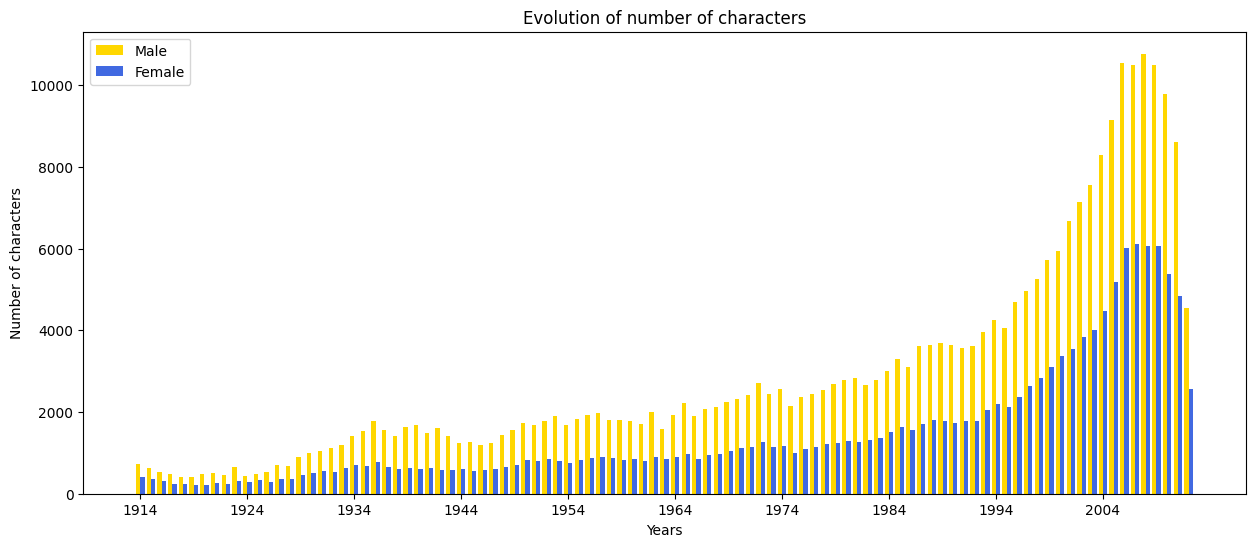

In [27]:
# plot depicting the evolution of the number of characters through the years
nb_char_through_years(characters_gender_time, 'movie_release_date', 'Evolution of the number of characters in movies through the years', LABELS)

**Analysis**
Overall, there are consequently more male than female characters, almost double amount. They both follow the same left-skewed distribution, which is due to the augmenting number of movies over the period studied.

In [ ]:
characters_gender_time["proportion_F"] = characters_gender_time[1]/ (characters_gender_time[1]+characters_gender_time[0])
characters_gender_time["std_F"] = np.sqrt((characters_gender_time["proportion_F"]*(1-characters_gender_time["proportion_F"])) / (characters_gender_time[1]+characters_gender_time[0]))
characters_gender_time_filtered = characters_gender_time[characters_gender_time["num_movies"] >= 200]

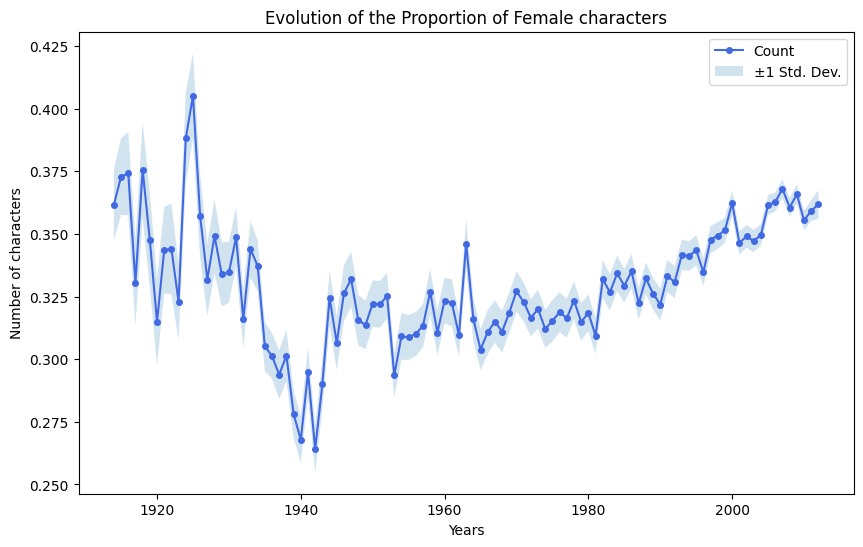

In [41]:
evolution_fem_char(characters_gender_time_filtered, 'movie_release_date', 'proportion_F', 'std_F', 'Evolution of the Proportion of Female characters in movies')

Interestingly, the number of female characters over the years reached its maximum (around 40%) in 1925, which correspond to the introduction of sound in movies. The proportion then drastically dropped until 1942, with over a fourth of the characters represented by women. It then increased and stabilized at around 30-35%, where it steadily increased reaching  36% in 2013.

# OTHER GRAPH COMES HERE

## C. How Women are "used" in movies : Bechdel Test

### 1) Primary Analysis

In [88]:
bechdel_test_ratings_by_gender(movies_complete_df)

**Analysis**
# TO DO

In [ ]:
corr_bechdel(movies_complete_df)

**Analysis**
# TO DO

### 2) When linked with sentiment analysis

In [ ]:
graph_emotions(movies_complete_df)

**Analysis**
We see that more film summaries are categorised as including anger, whereas few contain joy or surprise. For further analysis, we want to investigate the potential relationship between the emotions and the genders of the main actors.

In [ ]:
# Graph of the ratio of emotions by director gender
ratios_women, ratios_men = ratio_emotion_by_director_gender(movies_complete_df)
graph_ratio_emotion_by_director_gender(ratios_women, ratios_men)

**Analysis**
# TO DO

In [ ]:
graph_emotions_bechdel_combined(movies_complete_df)

**Analysis**
# TO DO

## D. TV TROPES

In [ ]:
#filtered_tropes, final_tropes = preprocess_tvtropes(movies_complete_df) - to do once to generate the csv file

## E. Public and Financial Recognition

In [9]:
movies_complete_df.groupby('director_gender')['num_votes'].describe()

count          mean           std  ...     50%     75%        max
director_gender                                       ...                           
F                 3035.0  10206.587479  39639.966169  ...  1025.0  4227.0   745178.0
M                29138.0  21236.871130  94003.532365  ...  1293.0  5981.0  2952726.0

[2 rows x 8 columns]

By computing statistics proportional to the number of movies directed by each gender, we observe a consequent difference regarding the number of votes attributed to movie amongst genders. On average, movies directed by men will receive twice the amount of ratings compared to movies directed by women. This parameter is although not resistant against extreme values. By comparing the median, we observe a smaller difference.

In [34]:
movies_complete_df['director_gender'].value_counts()

director_gender
M    29137
F     3035
Name: count, dtype: int64

In [18]:
avg_rating(movies_complete_df, LABELS)

The movies directed by women seem to be interestingly better rated than the ones directed by men, which demonstrates more public interest in movies directed by women. We can now wonder whether such difference is also depicted in the economical success of the movie ?

In [19]:
avg_box_office(movies_complete_df, LABELS)

**Analysis**
# TO DO

We will now compare the ratings of distinct groups of movies defined according to specific conditions. The goal of this analysis is to create two categories : the movies that pass the Bechdel test and having a consequent female representation amongst their actors (> 35%) vs the movies that failed the Bechdel test (<= 2) and have a poor female representation (<= 35%)

In [44]:
# in order to filter movies according to representation of female actors
actor_gender_movie_data = movies_complete_df.groupby('wikipedia_movie_id')['actor_gender'].value_counts()
prop_female_actors = actor_gender_movie_data[:, 'F'] / actor_gender_movie_data.groupby(level=0).sum()

In [ ]:
# "optimal" & "worst" group
optimal_df = group_formation(movies_complete_df, opti=True)
worst_df = group_formation(movies_complete_df, opti=False)

In [63]:
optimal_df['director_gender'].value_counts()

director_gender
M    1036
F     206
Name: count, dtype: int64

In [64]:
worst_df['director_gender'].value_counts()

director_gender
M    1059
F      50
Name: count, dtype: int64

Around 31% of the movie directors which movie is considered "optimal" are female.

Around 4,7% of the movie directors which movie is considered "worst" are female.

In [40]:
avg_rating_groups(optimal_df, LABELS)

**Analysis**
# TO DO

In [41]:
avg_rating_groups(worst_df, LABELS)

**Analysis**
# TO DO

In [23]:
# plotting the budget through the years
budget_through_years(movies_complete_df, LABELS)

**Analysis**
# TO DO

Let's pursue the analysis by bringing back the "optimal" and "worse" groups and performing statistical analysis on rendement on these.

In [ ]:
optimal_df['movie_rendement'] = optimal_df['box_office_revenue'] / optimal_df['movie_budget']
worst_df['movie_rendement'] = worst_df['box_office_revenue'] / worst_df['movie_budget']

In [56]:
# rendement of the Optimal group
rendement_groups(optimal_df, "Optimal", LABELS) # prior removal of outliers

**Analysis**
# TO DO

In [60]:
# plot rendement of the worst group
rendement_groups(worst_df, "Worst", LABELS) # prior removal of outliers

**Analysis**
# TO DO

# FROM HERE TV TROPES STUFF

## 2.2. CHARACTER TYPES

Here, we separate the columns so it is more easy to understand.

We add the character information and especially its gender.

In [ ]:
tvtropes_df['actor_gender'] = tvtropes_df['actor_name'].map(char_metadata_df.set_index('actor_name')['actor_gender'].to_dict())


We count the number of female and male characters. There is much more males, which introduces some bias in our analysis. We are not sure if we want to use this file since it could contain biased information about genders, and the file is only 500 rows so it is quite small.

We plot the repartition of the gender characters along the tv tropes.

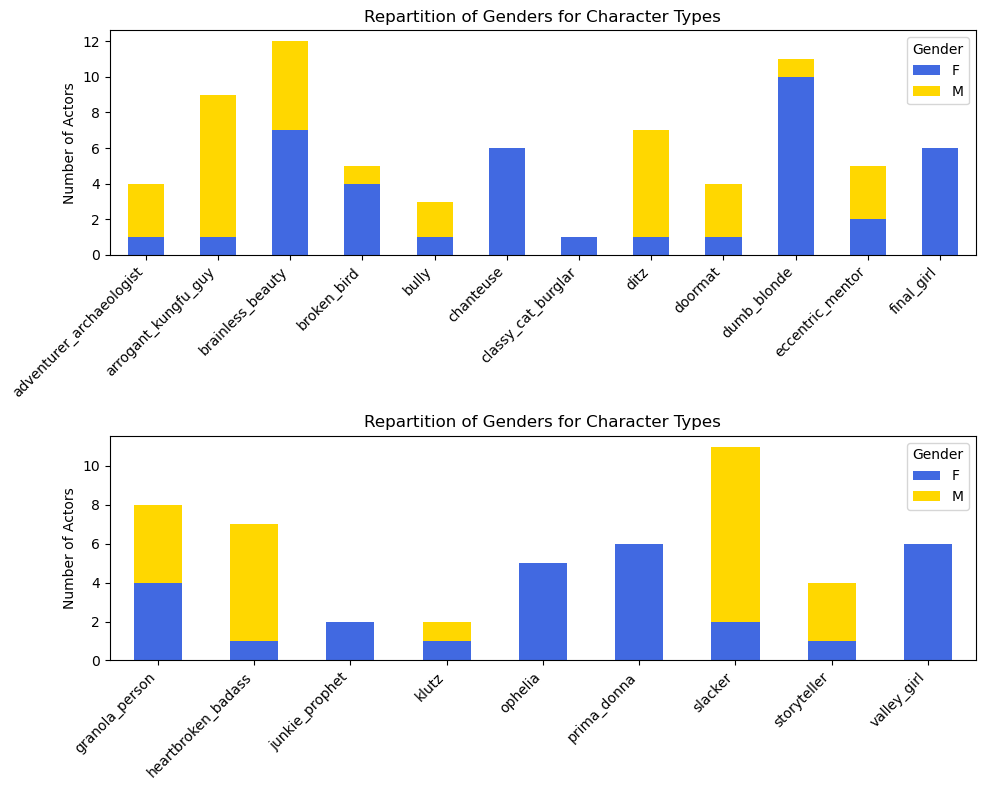

In [ ]:
# Filter rows where 'actor_gender' contains 'F'
character_type_gender_counts = tvtropes_df.groupby(['character_type', 'actor_gender']).size().unstack(fill_value=0)
filtered_character_type_gender_counts = character_type_gender_counts[character_type_gender_counts['F'] > 0]

In [ ]:
# plot repartition of gendes for character types
gender_char_types(filtered_character_type_gender_counts, "Number of Actors", "Repartition of Genders for Character Types")

Here, we only plotted the categories that have some female characters. As expected following societal cliches, female characters are often juged based on their appearance (ex :"dumb blond") whereas more flatterous characters are predominantly males such as "byronic_hero" or "master_swodsman". Some categories are 100% female characters: chanteuse, final_girl, ophelia, prima_donna, valley_girl. Indeed, some genders word are contained in the title of the tv tropes. As for the category brainless beauty, we observe it is almost 50-50 but considering there is really less female characters, it is obvious to see that it is disproportionate.